In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os.path as path

from sklearn.model_selection import train_test_split

In [17]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/sample_submission.csv')

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


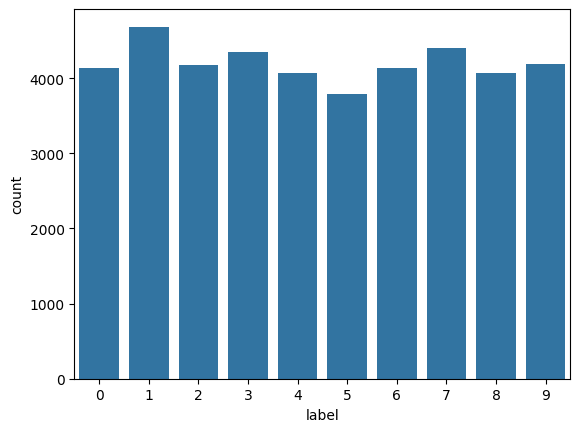

In [18]:
X = train.drop(columns=['label'])
y = train['label']

sns.countplot(x=y)
plt.show()

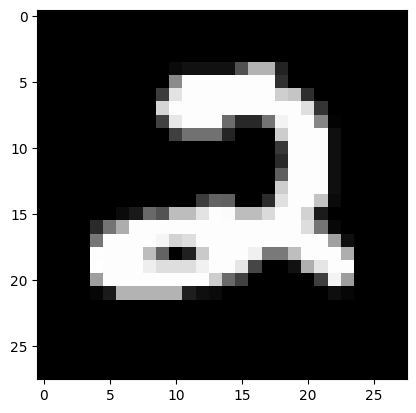

In [19]:
def view_image(img):
    plt.imshow(img, cmap='gray')
    plt.show()

sample_image = test.iloc[0].values.reshape(28, 28)
view_image(sample_image)

In [20]:
from tensorflow.keras.utils import to_categorical # one-hot-encoding

X = X.astype('float32') / 255
X_np = X.values.reshape(-1, 28, 28, 1)

test = test.astype('float32') / 255
x_test = test.values.reshape(-1, 28, 28, 1)

y_np = to_categorical(y)

print(X_np.shape, y_np.shape)

(42000, 28, 28, 1) (42000, 10)


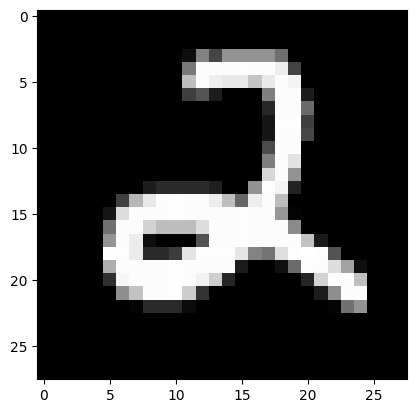

In [21]:
train_x, val_x, train_y, val_y = train_test_split(X_np, y_np, test_size=0.1, random_state=0)

view_image(train_x[0])

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten layers
model.add(Flatten())

# Add dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\Shiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# data augmentation
datagen = ImageDataGenerator(
    zoom_range = 0.1,
    height_shift_range = 0.1,
    width_shift_range = 0.1,
    rotation_range = 10,
)

In [27]:
# Train the model using the augmented data
datagen.fit(train_x)
history = model.fit(
    datagen.flow(train_x, train_y, batch_size=16), 
    epochs=10,
    validation_data=(val_x, val_y)
)

Epoch 1/10
2363/2363 ━━━━━━━━━━━━━━━━━━━━ 37s 16ms/step - accuracy: 0.9394 - loss: 0.1979 - val_accuracy: 0.9845 - val_loss: 0.0469
Epoch 2/10
2363/2363 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.9535 - loss: 0.1586 - val_accuracy: 0.9881 - val_loss: 0.0395
Epoch 3/10
2363/2363 ━━━━━━━━━━━━━━━━━━━━ 44s 19ms/step - accuracy: 0.9576 - loss: 0.1436 - val_accuracy: 0.9910 - val_loss: 0.0336
Epoch 4/10
2363/2363 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.9595 - loss: 0.1317 - val_accuracy: 0.9900 - val_loss: 0.0368
Epoch 5/10
2363/2363 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9646 - loss: 0.1241 - val_accuracy: 0.9890 - val_loss: 0.0321
Epoch 6/10
2363/2363 ━━━━━━━━━━━━━━━━━━━━ 44s 19ms/step - accuracy: 0.9656 - loss: 0.1134 - val_accuracy: 0.9890 - val_loss: 0.0335
Epoch 7/10
2363/2363 ━━━━━━━━━━━━━━━━━━━━ 45s 19ms/step - accuracy: 0.9668 - loss: 0.1127 - val_accuracy: 0.9900 - val_loss: 0.0335
Epoch 8/10
2363/2363 ━━━━━━━━━━━━━━━━━━━━ 44s 19ms/step - accuracy: 0.9689 -

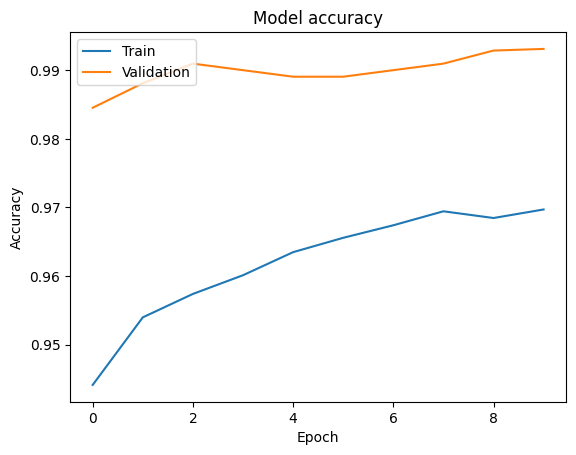

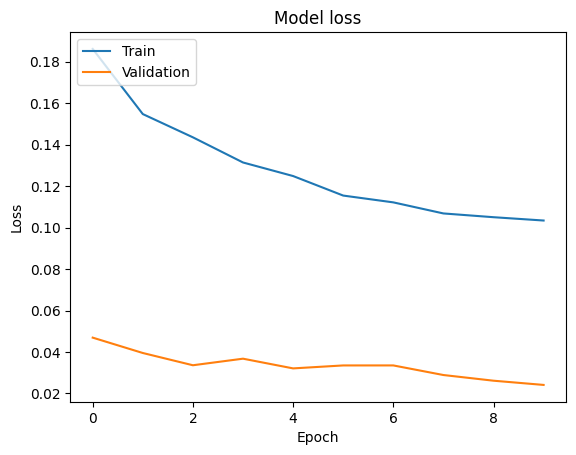

In [28]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [29]:
pred = model.predict(x_test)
y_test = np.argmax(pred, axis=1)

submission['Label'] = y_test

875/875 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step


In [30]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [31]:
submission.to_csv(path.join("submissions", input() + ".csv"), index=False)
print("Submission saved")

Submission saved
